In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import joblib

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\somri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Replace with your local dataset path
df = pd.read_csv("spam.csv", encoding='latin-1')[["v1", "v2"]]
df.columns = ["label", "text"]
df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


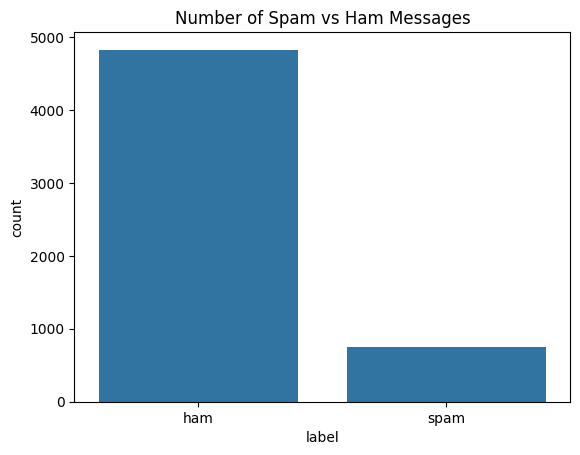

In [5]:
sns.countplot(x='label', data=df)
plt.title("Number of Spam vs Ham Messages")
plt.show()


In [6]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)


In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['label'].map({'ham': 0, 'spam': 1})


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
print("Naive Bayes:\n", classification_report(y_test, model_nb.predict(X_test)))

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
print("Logistic Regression:\n", classification_report(y_test, model_lr.predict(X_test)))

# SVM
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)
print("SVM:\n", classification_report(y_test, model_svm.predict(X_test)))


Naive Bayes:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Logistic Regression:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.96      0.60      0.74       150

    accuracy                           0.94      1115
   macro avg       0.95      0.80      0.85      1115
weighted avg       0.94      0.94      0.94      1115

SVM:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.84      0.90       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.94      1115
weighted avg       0.98      0.9

In [11]:
joblib.dump(model_nb, "spam_model_nb.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [12]:
import gradio as gr

def predict_spam(message):
    cleaned = clean_text(message)
    vect = vectorizer.transform([cleaned])
    prediction = model_nb.predict(vect)[0]
    return "🚫 Spam" if prediction == 1 else "✅ Not Spam"

gr.Interface(fn=predict_spam, inputs="text", outputs="text", title="📩 SMS Spam Classifier").launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
